In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

1.14.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_lables),(test_images, test_labels) = fashion_mnist.load_data()

In [5]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(test_images)

10000

## 数据预处理

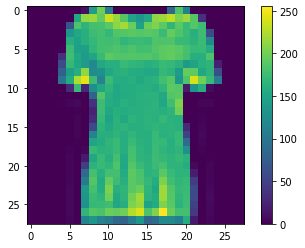

In [9]:
plt.figure()
plt.imshow(train_images[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

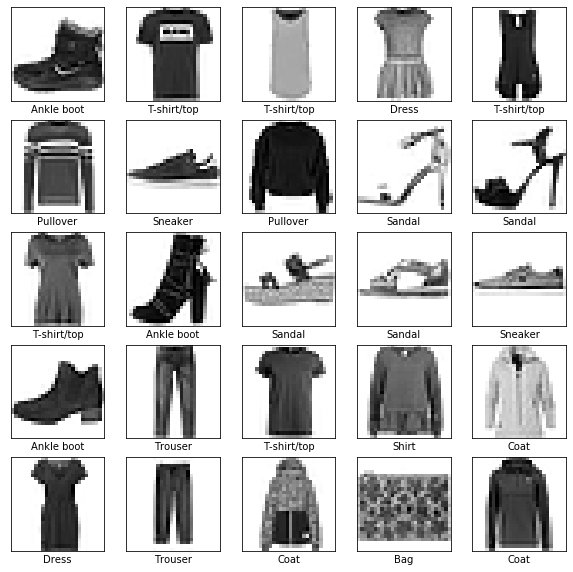

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_lables[i]])
plt.show()

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

W0905 11:42:13.573264 4718278080 deprecation.py:506] From /Users/xueqiu/anaconda3/envs/tensor/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
model.fit(train_images, train_lables, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.5005 - acc: 0.8241
Epoch 2/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3762 - acc: 0.8644
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3364 - acc: 0.8778
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.3122 - acc: 0.8859
Epoch 5/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.2929 - acc: 0.8929
Epoch 6/10
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2776 - acc: 0.8969
Epoch 7/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2674 - acc: 0.9016
Epoch 8/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.2555 - acc: 0.9056
Epoch 9/10
60000/60000 [==============================] - 8s 138us/sample - loss: 0.2463 - acc: 0.9092
Epoch 10/10
60000/60000 [==============================] - 6s 98us/sample -

In [14]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\nTest accuracy:', test_acc)

10000/10000 [==============================] - 0s 44us/sample - loss: 0.3415 - acc: 0.8793

Test accuracy: 0.8793


In [15]:
predictions = model.predict(test_images)

In [16]:
predictions[0]

array([1.8258451e-08, 5.6508420e-10, 1.6548564e-10, 1.9603744e-12,
       9.3787089e-10, 7.4665719e-03, 5.2212623e-10, 4.3841227e-04,
       5.3015185e-08, 9.9209493e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 
                                        100*np.max(predictions_array),
                                        class_names[true_label]),color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

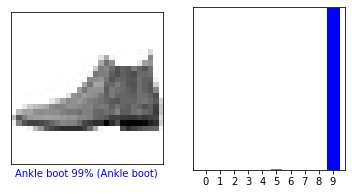

In [20]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

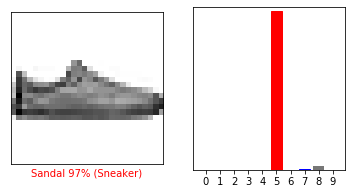

In [21]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

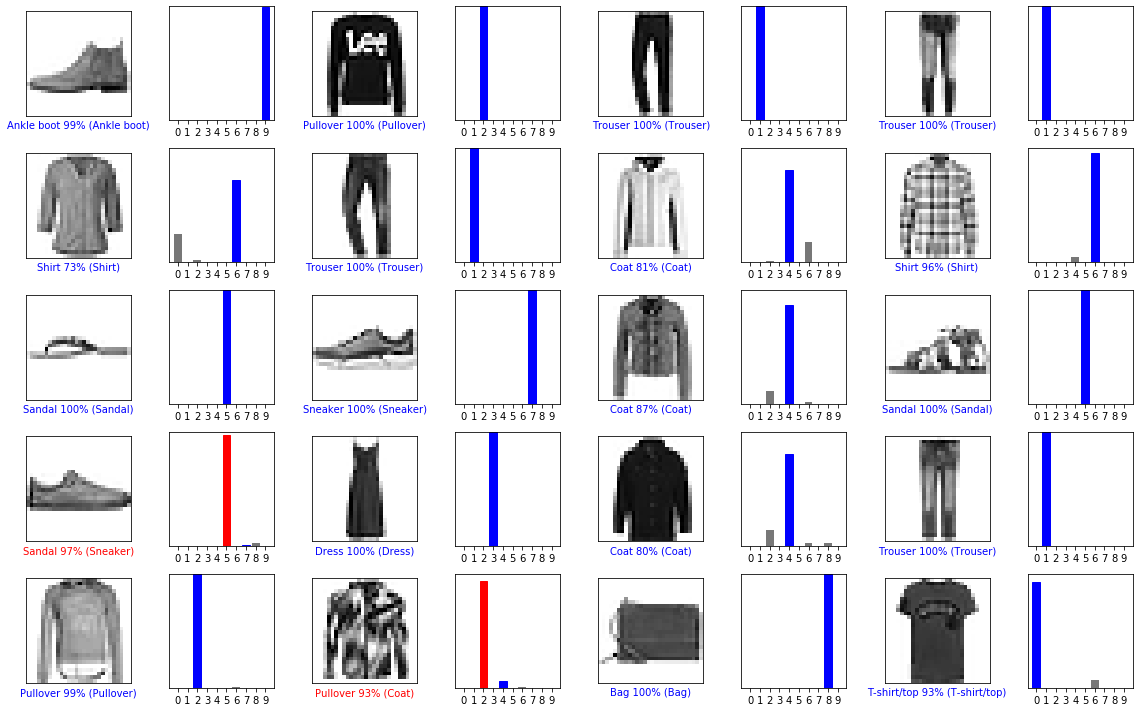

In [22]:
num_rows = 5
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()